## Prim's algorithm implementation

In [35]:
import heapq as hq

def extract_vertices(edges):
    '''
    Utility: Extracts all the unique vertices from the list of edges.
    ''' 
    vertices = []
    for edge in edges:
        if edge[0] not in vertices:
            vertices.append(edge[0])
        if edge[1] not in vertices:
            vertices.append(edge[1])
    return vertices

def find_adjacent_nodes(current_node, edges):
    '''
    Utility: Returns the list of adjacent nodes (with their weights) of current node. Format = (vertex, weight)
    '''
    adj_nodes = []
    for edge in edges:
        if(edge[0] == current_node):
            adj_nodes.append((edge[1], edge[2]))
        elif edge[1]==current_node:
            adj_nodes.append((edge[0], edge[2]))
    return adj_nodes

def check_if_visited(node, visited_edges):
    '''
    Utility: Checks if the node is present in visited edges or not. If present, returns the edge too.
    '''
    for edge in visited_edges:
        if(edge[0] == node or edge[1]==node):
            return edge, True
    return None, False

def cycle_formed(node1, node2, visited_edges):
    '''
    Utility: Checks if adding node1 and node2 to visited_edges create a cycle 
    '''
    for edge in visited_edges:
        if node1==edge[0] and node2==edge[1]:
            return True
        elif node1==edge[1] and node2==edge[0]:
            return True
    return False


def MST_Prim(edges):
    '''
    Implementation of Prim's algorithm.
    '''
    vertices = extract_vertices(edges)
    inf = float('inf')
    visited_edges = []
    priority_q = []
    #initialize the priority queue as (weight, vertex)
    for idx in range(len(vertices)):
        #initialize the first vertex to 0, node.
        if idx == 0:
            priority_q.append((0,vertices[idx]))
        else:
            priority_q.append((inf,vertices[idx]))
    hq.heapify(priority_q)
    #repeat until the queue is empty
    while len(priority_q) != 0:
        current_node = hq.heappop(priority_q)
        adj_nodes = find_adjacent_nodes(current_node[1], edges)
        for adj_node in adj_nodes:
            if adj_node[0] != current_node[1]:
                visited_edge, present = check_if_visited(adj_node[0], visited_edges)
                if present:
                    #check if current weight is less than previous visited weight
                    if adj_node[1] < visited_edge[2] and not cycle_formed(current_node[1], adj_node[0], visited_edges):
                        #if yes, remove the older visited edge
                        visited_edges.remove(visited_edge)
                        #and add the new edge with new weight
                        visited_edges.append((current_node[1], adj_node[0], adj_node[1]))
                        #delete the priority queue entry for the adjacent node
                        for element in priority_q:
                            if element[0]==adj_node[1] and element[1] == adj_node[0]:
                                priority_q.remove(element)
                        #push in the priority queue in the format (weight, node)
                        hq.heappush(priority_q, (adj_node[1], adj_node[0]))
                elif not present:
                    #delete the priority queue entry for the adjacent node
                    for element in priority_q:
                        if element[1] == adj_node[0]:
                            priority_q.remove(element)
                    #push in the priority queue in the format (weight, node)
                    hq.heappush(priority_q, (adj_node[1], adj_node[0]))
                    visited_edges.append((current_node[1], adj_node[0], adj_node[1]))
    #formatting the output
    total_weight = 0
    new_edge_list = []
    for edges in visited_edges:
        (node1, node2) = edges[0], edges[1]
        new_edge_list.append((node1, node2))
        total_weight += edges[2]
    return total_weight, new_edge_list

edges1 = [(0,1,1), (0,2,5), (1,2,1), (2,3,2), (1,3,6)]
# print(extract_vertices(edges1))
print(MST_Prim(edges1))
edges2 = [(0, 1, 2), (0, 3, 6), (1, 2, 3), (1, 3, 8), (1, 4, 5), (2, 4, 7), (3, 4, 9)]
# print(extract_vertices(edges2))
print(MST_Prim(edges2))
edges3 = [(1,2,9),(1,3,4),(2,5,8), (5,4,5), (4,3,2), (3,6,7), (6,7,3), (7,5,6), (5,9,11), (9,7,12), (7,8,16), (6,8,14)]
print(MST_Prim(edges3))


(4, [(0, 1), (1, 2), (2, 3)])
(16, [(0, 1), (0, 3), (1, 2), (1, 4)])
(53, [(1, 3), (3, 4), (4, 5), (5, 2), (5, 7), (5, 9), (7, 6), (6, 8)])


## Kruskal's implementation

In [25]:
def find_forest(node, forests):
    '''
    Utility: Checks for the forests of the node. Returns the index of forest if found. Else, returns None.
    '''
    for forest in forests:
        for edge in forest:
            if edge[0]==node or edge[1] ==node:
                return forests.index(forest)
    return None

def MST_Kruskal(edges):
    edges.sort(key = lambda i:i[2])
    forests = []

    for edge in edges:
        if edge[0]!=edge[1]:
            #get the indices of the forests
            node1_forest = find_forest(edge[0], forests)
            node2_forest = find_forest(edge[1], forests)
            if node1_forest==None and node2_forest==None:
                forests.append([edge])
            elif node1_forest==None and node2_forest!=None:
                forests[node2_forest].append(edge)
            elif node2_forest==None and node1_forest!=None:
                forests[node1_forest].append(edge)
            elif node1_forest!=None and node2_forest!=None and node1_forest!=node2_forest:
                #this is the case for both nodes lying in two different forests.
                joined_forest = forests[node1_forest] + forests[node2_forest] + [edge]
                #remove the individual forests
                forests.pop(max(node1_forest, node2_forest))
                forests.pop(min(node1_forest, node2_forest))
                #add the joined forest
                forests.append(joined_forest)
    #formatting the output
    final_forest = forests[0]
    total_weight = 0
    new_edge_list = []
    for edges in final_forest:
        (node1, node2) = edges[0], edges[1]
        new_edge_list.append((node1, node2))
        total_weight += edges[2]
    return total_weight, new_edge_list

edges1 = [(0,1,1), (0,2,5), (1,2,1), (2,3,2), (1,3,6)]
print(MST_Kruskal(edges1))
edges2 = [(0, 1, 2), (0, 3, 6), (1, 2, 3), (1, 3, 8), (1, 4, 5), (2, 4, 7), (3, 4, 9)]
print(MST_Kruskal(edges2))
edges3 = [(1,2,9),(1,3,4),(2,5,8), (5,4,5), (4,3,2), (3,6,7), (6,7,3), (7,5,6), (5,9,11), (9,7,12), (7,8,16), (6,8,14)]
print(MST_Kruskal(edges3))


(4, [(0, 1), (1, 2), (2, 3)])
(16, [(0, 1), (1, 2), (1, 4), (0, 3)])
(53, [(6, 7), (4, 3), (1, 3), (5, 4), (7, 5), (2, 5), (5, 9), (6, 8)])


## Reading the lists from the given test cases

In [9]:
import ast
import os

directory_path = '/Users/prashant/Downloads/test_data/'  # Replace with the path to your directory
# List all files in the directory
file_list = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]
test_cases_prim = []
test_cases_kruskal = []

for file_name in file_list:
    # Open the text file for reading
    file_path = directory_path + file_name
    with open(file_path, 'r') as file:
        if(int(file_path.split('.')[0][-1])%2==0):
            # Read the content of the file
            content = file.read()
            test_case = ast.literal_eval(content)
            test_cases_prim.append(test_case)
        else:
            # Read the content of the file
            content = file.read()
            test_case = ast.literal_eval(content)
            test_cases_kruskal.append(test_case)
len(test_cases_prim)
len(test_cases_kruskal)



5

## Comparing the run time

In [36]:

def check_duplicates(edges):
    #new list of sorted edges
    new_edges = []
    for edge in edges:
        new_edges.append(tuple(sorted(edge)))
    #check lengths
    edges_set = set(new_edges)
    if len(edges_set) != len(edges):
        print("Duplicates found")
        print("length of edges = ", len(edges))
        print("length of edges = ", len(edges_set))
        return True
    print("Duplicates not found")
    return False

def uniq_nodes(edges):
    '''
    Utility: Extracts all the unique vertices from the list of edges.
    ''' 
    vertices = []
    for edge in edges:
        if edge[0] not in vertices:
            vertices.append(edge[0])
        if edge[1] not in vertices:
            vertices.append(edge[1])
    return len(vertices)

def compare_edges(edges_1, edges_2):
    if len(edges_1) > len(edges_2):
        print("Equal no of edges")
    else:
        print("Unequal no of edges")

for test_case in test_cases_prim:
    #Prim's algorithm
    prim_result = MST_Prim(test_case)
    krus_result = MST_Kruskal(test_case)
    print("PRIM")
    print(prim_result)
    print("No of unique vertices = ", uniq_nodes(prim_result[1]))
    check_duplicates(prim_result[1])
    print("No of edges = ", len(prim_result[1]))

    print("KRUSKAL")
    print(krus_result)
    print("No of unique vertices = ", uniq_nodes(krus_result[1]))
    check_duplicates(krus_result[1])
    print("No of edges = ", len(krus_result[1]))

for test_case in test_cases_kruskal:
    prim_result = MST_Prim(test_case)
    krus_result = MST_Kruskal(test_case)
    print("PRIM")
    print(prim_result)
    print("No of unique vertices = ", uniq_nodes(prim_result[1]))
    check_duplicates(prim_result[1])
    print("No of edges = ", len(prim_result[1]))

    print("KRUSKAL")
    print(krus_result)
    print("No of unique vertices = ", uniq_nodes(krus_result[1]))
    check_duplicates(krus_result[1])
    print("No of edges = ", len(krus_result[1]))

PRIM
(1499, [(577, 530), (577, 1481), (577, 1393), (577, 340), (577, 329), (577, 289), (577, 301), (577, 391), (577, 1122), (289, 433), (289, 1303), (289, 478), (289, 144), (289, 673), (144, 40), (144, 335), (144, 1299), (144, 361), (144, 293), (144, 746), (144, 1153), (144, 1124), (144, 285), (144, 786), (144, 1252), (144, 231), (40, 1301), (40, 147), (40, 626), (40, 717), (40, 1064), (40, 441), (40, 967), (40, 982), (40, 625), (40, 975), (147, 1065), (147, 46), (147, 1134), (147, 1465), (147, 724), (46, 666), (46, 537), (46, 151), (46, 923), (46, 1067), (46, 14), (46, 1085), (46, 664), (46, 1192), (46, 328), (46, 165), (46, 1093), (46, 1423), (14, 338), (14, 1049), (14, 1348), (14, 650), (14, 254), (151, 1407), (151, 986), (151, 1270), (151, 395), (165, 505), (165, 1403), (165, 8), (165, 1088), (165, 843), (165, 213), (165, 555), (165, 1308), (8, 667), (8, 840), (8, 748), (8, 1212), (8, 1189), (8, 766), (8, 569), (8, 477), (8, 1058), (213, 1016), (213, 1414), (213, 1484), (213, 831),

In [ ]:
import time
#format of list = [(length_of_test_case, time_taken)]
time_taken_for_prim = []
time_taken_for_kruskal = []

for test_case in test_cases_prim:
    #Prim's algorithm
    start = time.process_time()
    print(MST_Prim(test_case))
    elapsed = time.process_time() - start
    time_taken_for_prim.append((len(test_case), round(elapsed, 5)))

for test_case in test_cases_kruskal:
    #Kruskal's algorithm
    start = time.process_time()
    print(MST_Kruskal(test_case))
    elapsed = time.process_time() - start
    time_taken_for_kruskal.append((len(test_case), round(elapsed, 5)))

time_taken_for_prim
time_taken_for_kruskal

## Plot

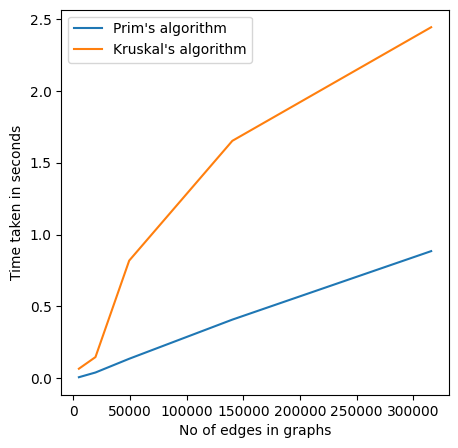

In [ ]:
#plotting the results
import matplotlib.pyplot as plt

time_taken_for_prim.sort()
time_taken_for_kruskal.sort()
plt.figure(figsize=(5,5))
x_axis = [el[0] for el in time_taken_for_prim]
y_axis = [el[1] for el in time_taken_for_prim]
plt.plot(x_axis, y_axis, label="Prim's algorithm")
x_axis = [el[0] for el in time_taken_for_kruskal]
y_axis = [el[1] for el in time_taken_for_kruskal]
plt.plot(x_axis, y_axis, label="Kruskal's algorithm")
plt.legend()
plt.xlabel('No of edges in graphs')
plt.ylabel('Time taken in seconds')
plt.show()